# Literature Mining

Here, we'll briefly demonstrate the use of `lisc` to mine PubMed literature.

In [1]:
# Install if necessary
!pip install lisc

In [13]:
# Import the Words object, which is used for words collection
from lisc import Words

# Set some search terms of interest
terms = [['prefrontal'], ['working memory'],['Parkinson\'s disease']]

# Initialize Words object and set the terms to search for
words = Words()
words.add_terms(terms)

# Collect words data
words.run_collection(retmax=5)

# Check the collected words data
print(words.results)

[<lisc.data.articles.Articles object at 0x10f068110>, <lisc.data.articles.Articles object at 0x10f068090>, <lisc.data.articles.Articles object at 0x10f44a4d0>]


In [14]:
# Look at the first five titles
print(words.results[0].titles)

['Shared Mechanisms in Dementia and Depression: The Modulatory Role of Physical Exercise.', 'Theta burst stimulation (TBS) in methamphetamine use disorder: a meta-analysis and systematic review.', 'Differentiated Presynaptic Input to OLMɑ2 Cells Along the Hippocampal Dorsoventral Axis: Implications for Hippocampal Microcircuit Function.', 'fNIRS evidence of abnormal frontotemporal cortex activation and functional connectivity in depressed patients after stroke: neuromodulatory mechanisms from mild to moderate depression.', "Efficacy of Yijinjing-inspired exercises on sleep disorders in Parkinson's disease: a controlled fNIRS study."]


In [15]:
# Import the Counts object, which is used for co-occurrence analysis
from lisc import Counts

# Initialize counts object & add the terms that we want to collect co-occurrences for
counts = Counts()
counts.add_terms(terms)

# Collect co-occurrence data
counts.run_collection(verbose=True)

# Check out the raw count data
print(counts.counts)

Running counts for:  prefrontal
Running counts for:  working memory
Running counts for:  Parkinson's disease
[[   0 6486 1658]
 [6486    0  798]
 [1658  798    0]]


In [22]:
# Define some new terms
terms_a = [['prefrontal cortex'], ['hippocampus'], ['habenula']]
terms_b = [['working memory'], ['Parkinson\'s disease'], ['Alzheimer\'s disease','dementia']]

# Set terms lists, indicating they are separate lists with the 'A' and 'B' labels
counts.add_terms(terms_a, dim='A')
counts.add_terms(terms_b, dim='B')

# Collect co-occurrence data
counts.run_collection()

# Look at the collected counts data for the first set of terms
counts.check_data(data_type='counts', dim='A')# Compute the association index

Unloading terms.
Unloading terms.
For  'prefrontal cortex'  the highest association is  'working memory'       with        5242
For  'hippocampus'        the highest association is  'Alzheimer's disease'  with       18059
For  'habenula'           the highest association is  'Parkinson's disease'  with          68


In [25]:
# Compute the Jaccard index
counts.compute_score('association')

# Check out the computed score
print(counts.score)

[[5.20757791e-02 6.74312877e-03 6.68048384e-03]
 [1.49328457e-02 6.93482329e-03 4.28465340e-02]
 [3.32129364e-04 5.35846559e-04 7.30392287e-05]]


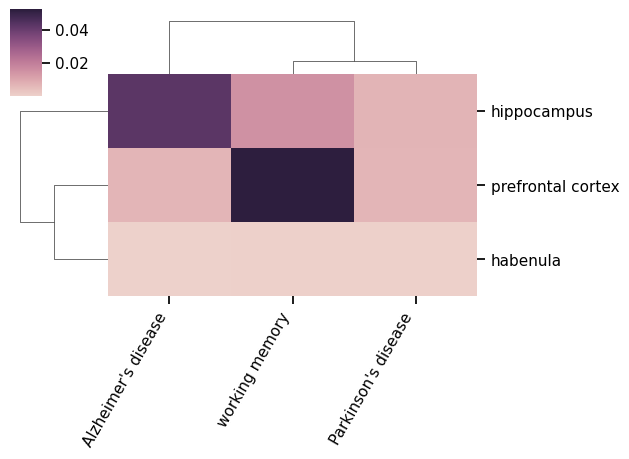

In [29]:
# Import plots that are available for co-occurrence analysis
from lisc.plts.counts import plot_matrix, plot_clustermap, plot_dendrogram

# Plot a clustermap of the association index data
plot_clustermap(counts, attribute='score')
